## Epistemic Uncertainty

## Generate sample dataset

In [7]:
import pandas as pd
import torch
from scipy import stats
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from uqX.modeling.uqXBnnModel import uqXBnnModel


def sample_dataset(start, end, n):
    x = np.linspace(start, end, n)
    sample_mean = [math.sin(i/2) for i in x]
    sample_var = [((abs(start)+abs(end))/2 - abs(i))/16 for i in x]
    y = stats.norm(sample_mean, sample_var).rvs()
    return x, y

start = -7
end = 7
n = 300

x_train, y_train = sample_dataset(start, end, n)
x_test, y_test = sample_dataset(-10, 10, 300)

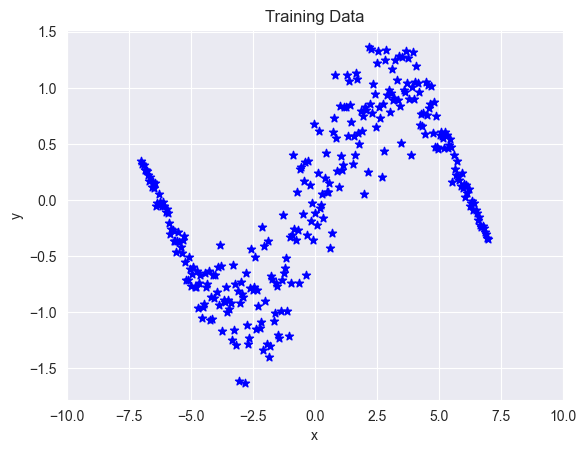

In [8]:
plt.scatter(x_train, y_train, c="blue", marker="*")
plt.xlim([-10, 10])
plt.title("Training Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Using the BNN Model 

In [9]:
# Initialize the model

x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

input_dim = x_train.shape[1]

bnn_model = uqXBnnModel(input_dim=input_dim, hidden_size=32)

# Train the model
bnn_model.train_model(x_train, y_train, epochs=100, batch_size=32, learning_rate=0.01)

# bnn_model.save_model('../models/trained_bnn_model.pth')
# bnn_model.load_model('../models/trained_bnn_model.pth')
# Generate the plot


Epoch 0/100, Loss: 17.50334949493408
Epoch 20/100, Loss: 13.53983736038208
Epoch 40/100, Loss: 10.614928913116454
Epoch 60/100, Loss: 7.739857292175293
Epoch 80/100, Loss: 4.977431201934815


C:\Users\Studium\Documents\uni\bachelorarbeit\uqX\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Studium\Documents\uni\bachelorarbeit\uqX\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Studium\Documents\uni\bachelorarbeit\uqX\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Studium\Documents\uni\bachelorarbeit\uqX\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

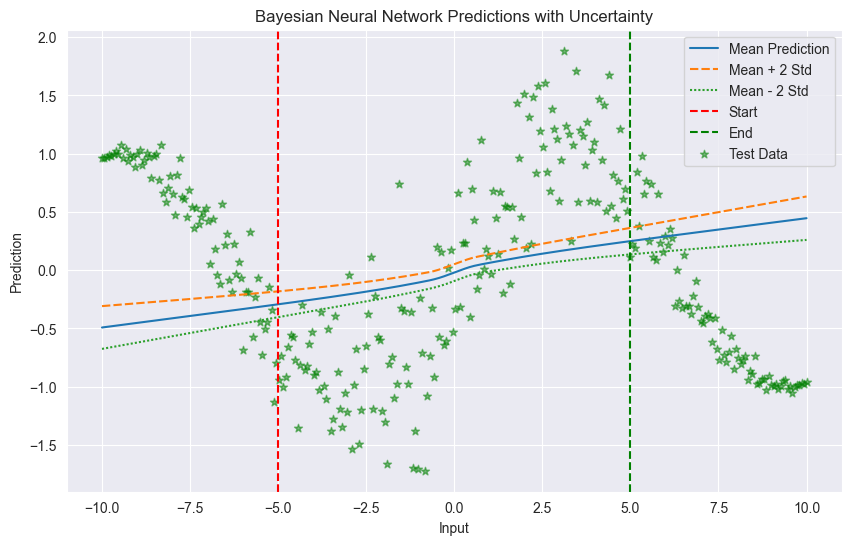

In [10]:
bnn_model.make_bnn_plot(x_test, y_test=y_test, samples=500, start=-5, end=5)

## Using Monte Carlo Dropout

In [11]:
from uqX.modeling.uqXmcdoModel import uqXmcdoModel

x_train, y_train = sample_dataset(start, end, n)
x_test, y_test = sample_dataset(-10, 10, 300)

# Convert to PyTorch tensors and reshape to (300, 1)
x_train = torch.from_numpy(x_train).float().view(-1, 1)  # Shape: (300, 1)
y_train = torch.from_numpy(y_train).float().view(-1, 1)  # Shape: (300, 1)


# Prepare DataLoader for training
train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize and train the model
mcdo_model = uqXmcdoModel(input_dim=1, hidden_size=32, dropout_rate=0.3)
mcdo_model.train_model(train_loader, epochs=150, learning_rate=0.01)

# # Save the trained model
mcdo_model.save_model("../models/uqXmcdo_model.pth")

# # Load the model and make predictions
mcdo_model.load_model("../models/uqXmcdo_model.pth")


Epoch 0 | Train Loss: 0.6328
Epoch 10 | Train Loss: 0.1767
Epoch 20 | Train Loss: 0.0701
Epoch 30 | Train Loss: 0.1536
Epoch 40 | Train Loss: 0.1590
Epoch 50 | Train Loss: 0.1260
Epoch 60 | Train Loss: 0.1157
Epoch 70 | Train Loss: 0.0545
Epoch 80 | Train Loss: 0.0603
Epoch 90 | Train Loss: 0.0968
Epoch 100 | Train Loss: 0.0773
Epoch 110 | Train Loss: 0.1002
Epoch 120 | Train Loss: 0.1184
Epoch 130 | Train Loss: 0.1222
Epoch 140 | Train Loss: 0.0689
Model saved to ../models/uqXmcdo_model.pth
Model loaded from ../models/uqXmcdo_model.pth


x_test.shape: torch.Size([300, 1])


C:\Users\Studium\Documents\uni\bachelorarbeit\uqX\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Studium\Documents\uni\bachelorarbeit\uqX\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Studium\Documents\uni\bachelorarbeit\uqX\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Studium\Documents\uni\bachelorarbeit\uqX\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

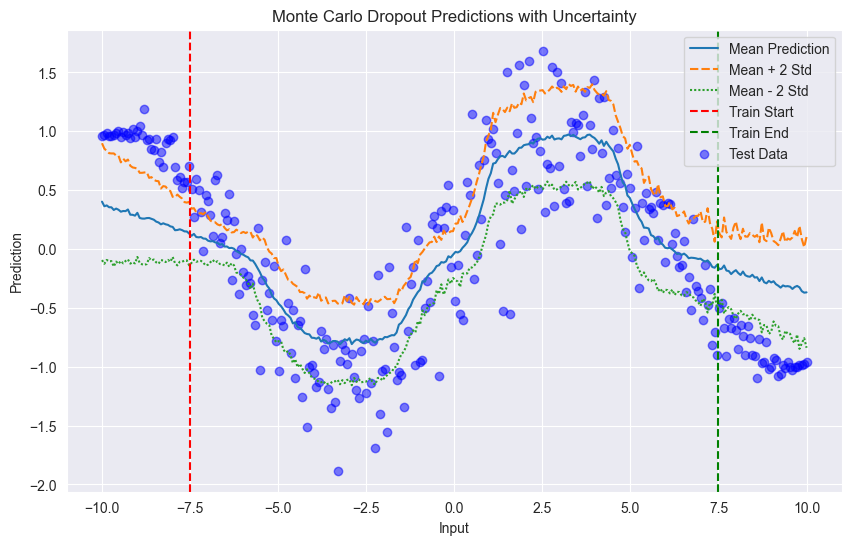

In [12]:
if isinstance(x_test, np.ndarray):
    x_test = torch.from_numpy(x_test).float()

if x_test.dim() == 1:  # If x_test is 1D, reshape to 2D
    x_test = x_test.view(-1, 1)  # Now shape is (300, 1)

# Check input shape before passing to the model
print(f"x_test.shape: {x_test.shape}")  # Should be (300, 1)

mcdo_model.make_mcdo_plot(x_test, y_test=y_test, mc_samples=200, start=-7.5, end=7.5)